In [4]:
# All libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Training Data import
df_train=pd.read_csv('/content/drive/MyDrive/datafordl/sentimentone-data/train.txt',delimiter=';',names=['text','label'])

In [6]:
# Val Data import
df_val=pd.read_csv('/content/drive/MyDrive/datafordl/sentimentone-data/val.txt',delimiter=';',names=['text','label'])

In [7]:
# Testing data import
test_df=pd.read_csv("/content/drive/MyDrive/datafordl/sentimentone-data/test.txt",delimiter=';',names=['text','label'])

In [8]:
# Merging training , val and test data
df=pd.concat([df_train,df_val,test_df])
df.reset_index(inplace=True,drop=True)

In [9]:
df.shape

(20000, 2)

In [10]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [11]:
df.label.value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64

<Axes: >

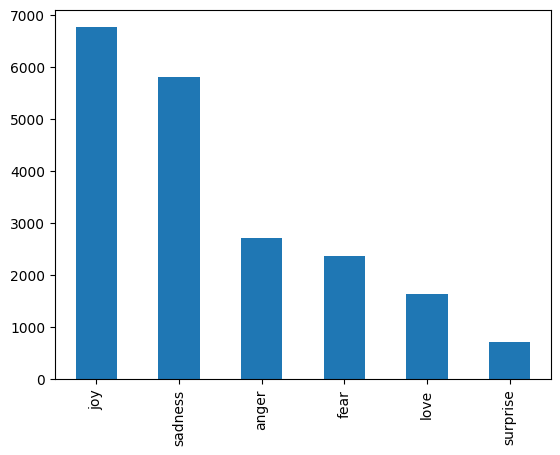

In [12]:
df.label.value_counts().plot.bar()

In [13]:
# Classifying with encoding
df['label'].replace(['joy','love','surprise'],1,inplace=True)
df['label'].replace(['sadness','anger','fear'],0,inplace=True)

In [14]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [15]:
lm=WordNetLemmatizer()

In [16]:
# Removing stop words and applying Lemmitization
def transform(df_column):
  output=[]
  for i in df_column:
    new_text=re.sub('[^a-zA-Z]',' ',str(i))
    new_text=new_text.lower()
    new_text=new_text.split()
    new_text=[lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
    output.append(' '.join(str(k) for k in new_text))
  return output

In [17]:
var=transform(df.text)

In [18]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [19]:
# Wordcloud
plt.figure(figsize=(50,48))
word=''
for i in var:
  for j in i:
    word+=" ".join(j)

<Figure size 5000x4800 with 0 Axes>

In [20]:
wc=WordCloud(width=1000,height=500,background_color='white',min_font_size=10).generate(word)

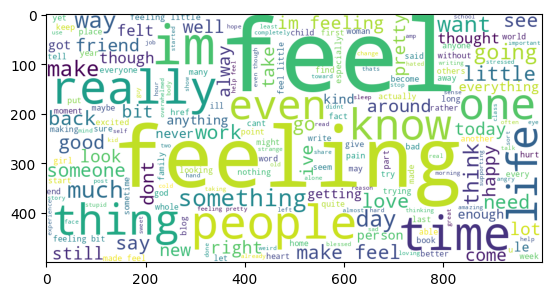

In [21]:
plt.imshow(wc)

In [22]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=100)

In [23]:
# Bag of words (BOW)
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [24]:
# Model
model=RandomForestClassifier()

In [25]:
# Training the model
model.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
# Predicting the sentiments
y_pred=model.predict(X_test)

In [27]:
# Accuracy
accuracy_score(y_test,y_pred)

0.94